# Chapter 1 - Computer Exercise

In [2]:
import wooldridge
import pandas as pd
import numpy as np

In [3]:
wooldridge.data()

  J.M. Wooldridge (2019) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

## C1

Use the data in WAGE1 for this exercise.

In [5]:
wage1 = wooldridge.data('wage1')
wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


### (i) Find the average education level in the sample. What are the lowest and highest years of education?

In [7]:
educ = wage1.copy()
educ = educ[['educ']]
educ.describe()

,educ
count,526.000000
mean,12.562738
std,2.769022
min,0.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,18.000000


By using the describe method, we can see the statistics of the sample. The average education level in the sample is 12.56 years. For the lowest and highest years of education are 0 and 18, respectively.

### (ii) Find the average hourly wage in the sample. Does it seem high or low?

In [10]:
hourly_wage = wage1.copy()
hourly_wage = hourly_wage[['wage']]
avg_hw = hourly_wage.mean()

For me to draw conclusion, I would like to see the distribution of the sample. So let's create a histogram.

In [12]:
import matplotlib.pyplot as plt

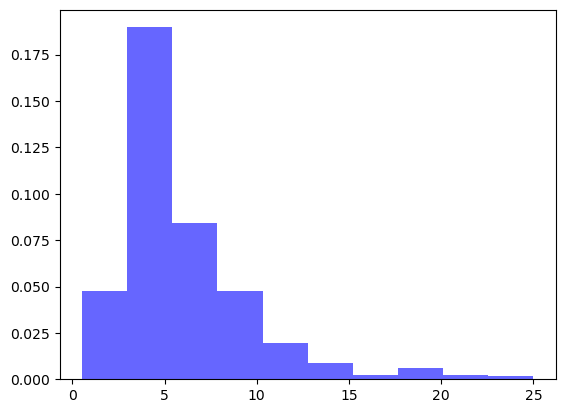

In [13]:
plt.hist(hourly_wage, bins=10, density=True, alpha=0.6, color='b')
plt.show()

According to the distribution of the data, when we have outliers the average hourly wage is low. But without these outliers, the hourly wage is normal (neither high or low). 

### (iii) The wage data are reported in 1976 dollars. Using the Internet or a printed source, find the Consumer Price Index (CPI) for the years 1976 and 2013.

The CPI for 1976 was 56.9, while in 2013, 233.

### (iv) Use the CPI values from part (iii) to find the average hourly wage in 2013 dollars. Now does the average hourly wage seem reasonable?

Formula: Real Hourly Rate = (Nominal Hourly Wage / CPI for 2013) x 100

In [19]:
cpi_1976 = 56.9
cpi_2013 = 233

usd_2013 = (avg_hw / cpi_2013) * 100
usd_2013

wage    2.530516
dtype: float64

Based on the calculation using 2013 dollars, the average hourly wage doesn't seem reasonable. The value of dollars decreases and so does the average hourly wage.

### (v) How many women are in the sample? How many men?

In [22]:
gender = wage1.copy()

In [23]:
# female = 1
female = gender[gender['female'] == 1]
female.count()

wage        252
educ        252
exper       252
tenure      252
nonwhite    252
female      252
married     252
numdep      252
smsa        252
northcen    252
south       252
west        252
construc    252
ndurman     252
trcommpu    252
trade       252
services    252
profserv    252
profocc     252
clerocc     252
servocc     252
lwage       252
expersq     252
tenursq     252
dtype: int64

In [24]:
# male = 0
male = gender[gender['female'] == 0]
male.count()

wage        274
educ        274
exper       274
tenure      274
nonwhite    274
female      274
married     274
numdep      274
smsa        274
northcen    274
south       274
west        274
construc    274
ndurman     274
trcommpu    274
trade       274
services    274
profserv    274
profocc     274
clerocc     274
servocc     274
lwage       274
expersq     274
tenursq     274
dtype: int64

There are 252 women and 274 men in the given sample.

## C2

Use the data in BWGHT to answer this question.

In [37]:
bwght = wooldridge.data('bwght')
bwght.head(10)

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186
5,7.5,16.5,122.300003,118,12.0,14.0,6,1,0,0,4.770685,7.3750,0.0,2.014903
6,65.0,16.5,122.300003,140,16.0,14.0,2,0,1,0,4.941642,8.7500,0.0,4.174387
7,27.5,16.5,122.300003,86,12.0,14.0,2,0,0,0,4.454347,5.3750,0.0,3.314186
8,27.5,16.5,122.300003,121,12.0,17.0,2,0,1,0,4.795791,7.5625,0.0,3.314186
9,37.5,16.5,122.300003,129,16.0,18.0,2,0,1,0,4.859812,8.0625,0.0,3.624341


### (i) How many women are in the sample, and how many report smoking during pregnancy?

In [97]:
data = bwght.copy()
tot_women = data
tot_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   faminc    1388 non-null   float64
 1   cigtax    1388 non-null   float64
 2   cigprice  1388 non-null   float64
 3   bwght     1388 non-null   int64  
 4   fatheduc  1192 non-null   float64
 5   motheduc  1387 non-null   float64
 6   parity    1388 non-null   int64  
 7   male      1388 non-null   int64  
 8   white     1388 non-null   int64  
 9   cigs      1388 non-null   int64  
 10  lbwght    1388 non-null   float64
 11  bwghtlbs  1388 non-null   float64
 12  packs     1388 non-null   float64
 13  lfaminc   1388 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 151.9 KB


There are **1388** women in the sample.

In [100]:
cigs = data[data['cigs'] != 0]
cigs.count()

faminc      212
cigtax      212
cigprice    212
bwght       212
fatheduc    161
motheduc    212
parity      212
male        212
white       212
cigs        212
lbwght      212
bwghtlbs    212
packs       212
lfaminc     212
dtype: int64

There are **212** women reported smoking during pregnancy out of 1388. 

### (ii) What is the average number of cigarettes smoked per day? Is the average a good measure of the “typical” woman in this case? Explain.

In [109]:
stats = data[['cigs']]
stats.describe()

,cigs
count,1388.000000
mean,2.087176
std,5.972688
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,50.000000


The average number of cigarettes smoked per day is around 2.08. The average is not a good measure of the "typical" women in this case because it can be affected by outliers. The median is a good measure of "typical" woman.

### (iii) Among women who smoked during pregnancy, what is the average number of cigarettes smoked per day? How does this compare with your answer from part (ii), and why?

In [127]:
# remove women that are smoking and not in pregnancy

### (iv) Find the average of fatheduc in the sample. Why are only 1,192 observations used to compute this average?

### (v) Report the average family income and its standard deviation in dollars.